In [ ]:
# Initial code provided by Veena Suresh for the LSTM model
# This code for the BiLSTM model with additional outcome metrics

from datetime import datetime
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Define the path to the dataset
dataset_path = './Room2_npy'

# Define the target length for data trimming/padding
target_length = 750

# Define parameters for model
Model_type = "Bidirectional Long Short-Term Memory"
batchsize = 32
monitor_choice = 'val_loss'
dropout = 0.3
learningrate = 0.001

#Initialise lists
data_list = []
data_list1 = []
labels_list = []

classes_to_double = ["kneel", "liedown", "pickup", "walk"]

# Helper function to split sequences

def split_sequence(sequence, step):
    return [sequence[i:i + step] for i in range(0, len(sequence), step) if len(sequence[i:i + step]) == step]

#=========== New Function (Data augmentation) ===========
# Noise level set to 1% due to the noramalized signal [0-1]
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    noisy_data = data + noise
    return np.clip(noisy_data, 0, 1)
#========================================================


# Traverse through each activity directory
for activity_folder in os.listdir(dataset_path):
    activity_path = os.path.join(dataset_path, activity_folder)
##    print(f"Processing activity: {activity_folder}")

    if os.path.isdir(activity_path):
        for participant_file in os.listdir(activity_path):
            participant_path = os.path.join(activity_path, participant_file)
            if os.path.isfile(participant_path) and participant_file.endswith('.npy'):
##                print(f"Loading data from file: {participant_file}")
                data = np.load(participant_path)
                data = np.real(data)

                # Split data into smaller sequences
                data_splits = split_sequence(data, target_length)

                for split_data in data_splits:
                    # Normalize data
                    min_val = np.min(split_data)
                    max_val = np.max(split_data)
                    data_normalized = (split_data - min_val) / (max_val - min_val) if max_val != min_val else np.zeros(split_data.shape)

                    label = activity_folder
#                    data_list1.append(data_normalized[:, 0:30])
#                    labels_list.append(label)
#                    data_list1.append(data_normalized[:, 30:60])
#                    labels_list.append(label)
                    data_list.append(data_normalized)
                    labels_list.append(label)
                    if label in classes_to_double:
                        data_list.append(data_normalized.copy())  # Double the data
                        labels_list.append(label)  # Double the label

#=================== Data augmentation ===================
                    # if label == "walk":
                    data_list.append(add_noise(data_normalized))
                    labels_list.append(label)
#=========================================================

# Convert lists to arrays for machine learning processing
data = np.array(data_list)
labels = np.array(labels_list).reshape(-1, 1)

print("Final data shape:", data.shape)
print("Final labels shape:", labels.shape)

Final data shape: (3372, 750, 90)
Final labels shape: (3372, 1)


k-fold No: 1
2427
750
90


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.1176 - loss: 2.3718 - val_accuracy: 0.1005 - val_loss: 2.1515
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.1476 - loss: 2.1746 - val_accuracy: 0.1021 - val_loss: 2.7178
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.2855 - loss: 1.8676 - val_accuracy: 0.1005 - val_loss: 3.7286
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.3735 - loss: 1.5995 - val_accuracy: 0.1812 - val_loss: 2.3986
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.4200 - loss: 1.4688 - val_accuracy: 0.3707 - val_loss: 1.5628
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.4806 - loss: 1.3435 - val_accuracy: 0.2026 - val_loss: 2.9419
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.4872 - loss: 1.2686 - val_accuracy: 0.2306 - val_loss: 2.6445
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.5252 - loss: 1.2164 - val_

<Figure size 1200x800 with 0 Axes>

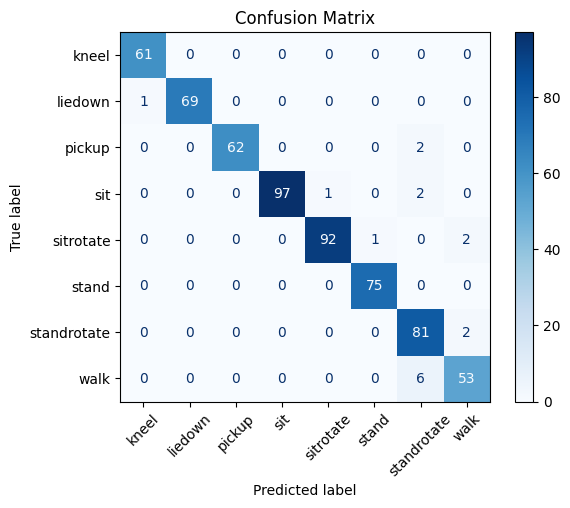


===========================End of fold 1===========================
k-fold No: 2
2427
750
90


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.1375 - loss: 2.4022 - val_accuracy: 0.1516 - val_loss: 2.1347
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.1397 - loss: 2.2348 - val_accuracy: 0.1170 - val_loss: 2.1429
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.1316 - loss: 2.2072 - val_accuracy: 0.1565 - val_loss: 2.2115
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.2438 - loss: 1.9471 - val_accuracy: 0.1845 - val_loss: 2.1384
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.3457 - loss: 1.7075 - val_accuracy: 0.3904 - val_loss: 1.5949
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.3823 - loss: 1.5217 - val_accuracy: 0.2702 - val_loss: 1.9837
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.4025 - loss: 1.4606 - val_accuracy: 0.2488 - val_loss: 2.4833
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.4803 - loss: 1.3162 - va

<Figure size 1200x800 with 0 Axes>

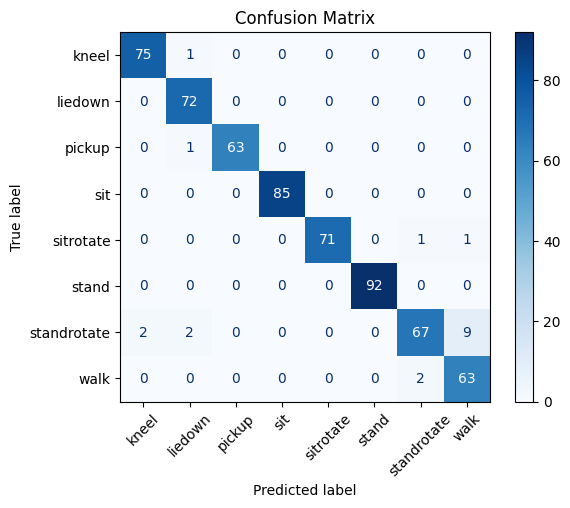


===========================End of fold 2===========================
k-fold No: 3
2427
750
90


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.1260 - loss: 2.3522 - val_accuracy: 0.1269 - val_loss: 2.1710
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.1128 - loss: 2.2707 - val_accuracy: 0.1532 - val_loss: 2.1465
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.1180 - loss: 2.2136 - val_accuracy: 0.1647 - val_loss: 2.1382
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.1553 - loss: 2.1561 - val_accuracy: 0.1450 - val_loss: 2.5368
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.2422 - loss: 1.9386 - val_accuracy: 0.2125 - val_loss: 1.8908
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.2461 - loss: 1.8104 - val_accuracy: 0.1433 - val_loss: 2.1527
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.3121 - loss: 1.6614 - val_accuracy: 0.0939 - val_loss: 2.8389
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.2871 - loss: 1.8334 - val_

<Figure size 1200x800 with 0 Axes>

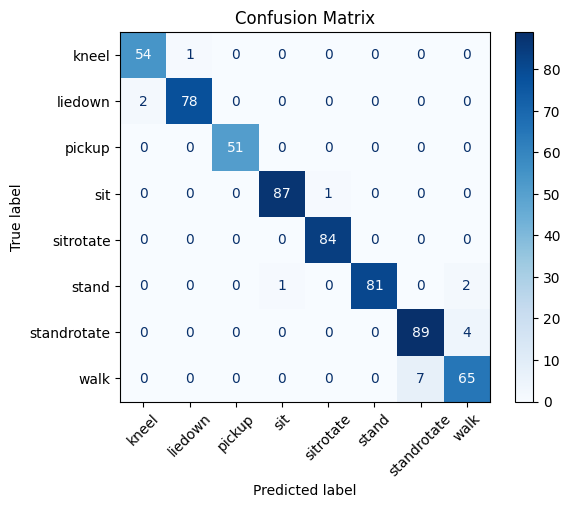


===========================End of fold 3===========================
k-fold No: 4
2427
750
90


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.1141 - loss: 2.3512 - val_accuracy: 0.1466 - val_loss: 2.1768
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.1311 - loss: 2.2291 - val_accuracy: 0.1269 - val_loss: 2.1361
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.1547 - loss: 2.1522 - val_accuracy: 0.1351 - val_loss: 2.4058
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.2487 - loss: 1.9020 - val_accuracy: 0.1351 - val_loss: 2.9898
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.2973 - loss: 1.7258 - val_accuracy: 0.1252 - val_loss: 4.1995
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.3649 - loss: 1.6215 - val_accuracy: 0.1565 - val_loss: 2.6483
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.4062 - loss: 1.4684 - val_accuracy: 0.3097 - val_loss: 2.4532
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.4424 - loss: 1.3849 - val_

<Figure size 1200x800 with 0 Axes>

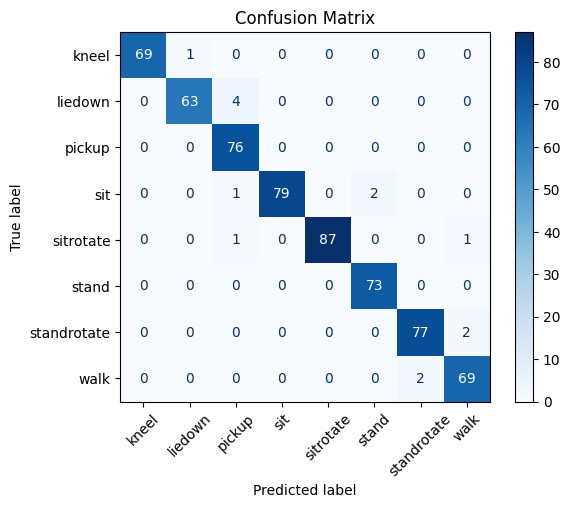


===========================End of fold 4===========================
k-fold No: 5
2428
750
90


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.1360 - loss: 2.4039 - val_accuracy: 0.1304 - val_loss: 2.1863
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.1351 - loss: 2.2681 - val_accuracy: 0.1056 - val_loss: 2.1471
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.1291 - loss: 2.2332 - val_accuracy: 0.1502 - val_loss: 2.1509
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.1702 - loss: 2.1267 - val_accuracy: 0.1568 - val_loss: 2.4694
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.2417 - loss: 1.8682 - val_accuracy: 0.1518 - val_loss: 3.0596
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.3607 - loss: 1.6087 - val_accuracy: 0.1931 - val_loss: 2.6839
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.4112 - loss: 1.4683 - val_accuracy: 0.3812 - val_loss: 1.4677
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.4734 - loss: 1.3367 - val

<Figure size 1200x800 with 0 Axes>

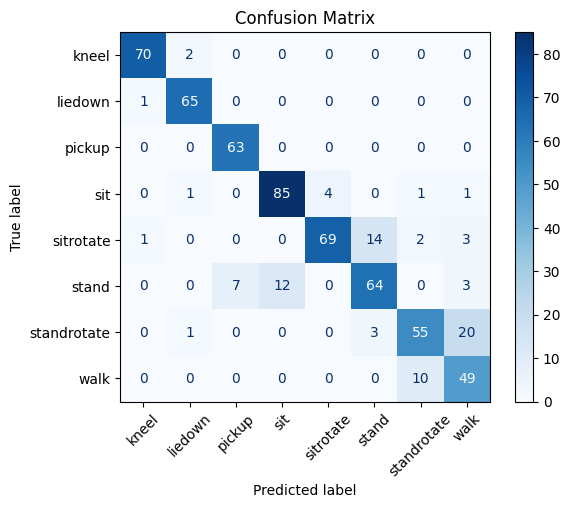


===========================End of fold 5===========================

 Cross-validation results: 
Mean loss: 0.1728 (+/- 0.1245)
Mean accuracy: 0.9492 (+/- 0.0456)


In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight


# Encode the labels before splitting the data
encoder = OneHotEncoder(sparse_output=False)
labels_encoded = encoder.fit_transform(labels)

X_train_val, x_test_holdout, y_train_val, y_test_holdout = train_test_split(data, labels_encoded, test_size=0.1, random_state = 42)

#===========K-fold (New code)===========
from sklearn.model_selection import KFold
val_index = {}
train_index = {}
#K
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)
accuracies = []
losses = []
fold_no = 1
for train_i, val_i in kf.split(X_train_val):
    val_index[f"fold_no_{fold_no}"] = val_i
    train_index[f"fold_no_{fold_no}"] = train_i
    X_train, X_test = X_train_val[train_i], X_train_val[val_i]
    y_train_encoded, y_test_encoded = y_train_val[train_i], y_train_val[val_i]
    print(f"k-fold No: {fold_no}")
#=======================================

    # Ensure Graphviz bin directory is in the PATH
    os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin'

    # Define the BiLSTM model
    model = Sequential()
    model.add(Input(batch_size= batchsize,shape=(X_train.shape[1], X_train.shape[2])))
    print(X_train.shape[0])
    print(X_train.shape[1])
    print(X_train.shape[2])
    model.add(Bidirectional(LSTM(128, return_sequences=True), merge_mode= 'sum'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

    # Compile the model with a different optimizer
    optimizer = Adam(learning_rate=learningrate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Print the model summary
    model.summary()

    # Implement early stopping
    monitor_choice = 'val_loss'
    patience_number = 20
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    epochsvalue = 100

    #=========== Class weight ===========
    labels_decoded = encoder.inverse_transform(y_train_encoded).flatten()
    class_weight_vect = compute_class_weight(class_weight='balanced',classes=encoder.categories_[0], y=labels_decoded)
    class_weight = {index: weight for index, weight in enumerate(class_weight_vect)}
    #====================================

    # start the timer for model training
    start_time = datetime.now()
    # Train the model
    history = model.fit(X_train, y_train_encoded, epochs=epochsvalue, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping], class_weight=class_weight)

    #Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test_encoded)

    end_time = datetime.now()
    time_difference = (end_time - start_time).total_seconds()/60

    #===========print the result for each fold(New code)===========
    print(f"\n Fold-number: {fold_no} - loss: {loss:.4f}, Accuracy: {accuracy:.4f} ")
    #save the model
    model.save(f"bilstm_fold_{fold_no}.keras")
    #===================================

    #store values to calculate average loss
    losses.append(loss)
    accuracies.append(accuracy)

    # Make predictions
    y_pred_encoded = model.predict(X_test)
    y_pred = np.argmax(y_pred_encoded, axis=1)
    y_true = np.argmax(y_test_encoded, axis=1)

    # Generate confusion matrix and model outcome metrics
    cm = confusion_matrix(y_true, y_pred)
    print()
    print(f"=================Model outcomes from fold-{fold_no}=================")
    print()
    print("Model type: ", Model_type)
    print()
    print(f"Execution time of fold-no {fold_no} is: {time_difference:.1f} minutes")
    print()
    print(f"Test loss:       {loss:.4f}")
    print(f"Test accuracy:   {accuracy:.4f}")
    print("Target Length:  ", target_length)
    print("Batch Size:     ", batchsize)
    print("Early Stopping: ", monitor_choice)
    print("Patience:       ", patience_number)
    print("Dropout:        ", dropout)
    print("Learning Rate:  ", learningrate)
    print()
    HAR_label = ['Kneel', 'Lie Down', 'Pick Up', 'Sit', 'Sit Rotate', 'Stand', 'Stand Rotate', 'Walk']

    # Print classification report
    print(classification_report(y_true, y_pred, zero_division=0, target_names=HAR_label))

    #print(confusion_matrix[0, 0])
    cmd = ConfusionMatrixDisplay(cm, display_labels=encoder.categories_[0])
    plt.figure(figsize=(12, 8))
    cmd.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=45)
    plt.title('Confusion Matrix')
    plt.show()

    #===================================
    print(f"\n===========================End of fold {fold_no}===========================")
    fold_no += 1


#calculate the average result
print("\n Cross-validation results: ")
print(f"Mean loss: {np.mean(losses):.4f} (+/- {np.std(losses):.4f})")
print(f"Mean accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
#===================================


In [4]:
print(accuracies)
print(losses)

[0.9719933867454529, 0.9686985015869141, 0.9703459739685059, 0.9769357442855835, 0.8580858111381531]
[0.10770965367555618, 0.11849906295537949, 0.11522696167230606, 0.10100643336772919, 0.4215182065963745]


### Evaluate models performance using a hold-out dataset

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step

=================Model outcomes from fold-1=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       0.98      1.00      0.99        56
    Lie Down       1.00      1.00      1.00        35
     Pick Up       1.00      1.00      1.00        33
         Sit       1.00      0.93      0.96        55
  Sit Rotate       0.95      0.91      0.93        46
       Stand       0.93      0.97      0.95        40
Stand Rotate       0.80      1.00      0.89        36
        Walk       0.97      0.81      0.88        37

    accuracy                           0.95       338
   macro avg       0.95      0.95      0.95       338
weighted avg       0.96      0.95      0.95       338



<Figure size 1200x800 with 0 Axes>

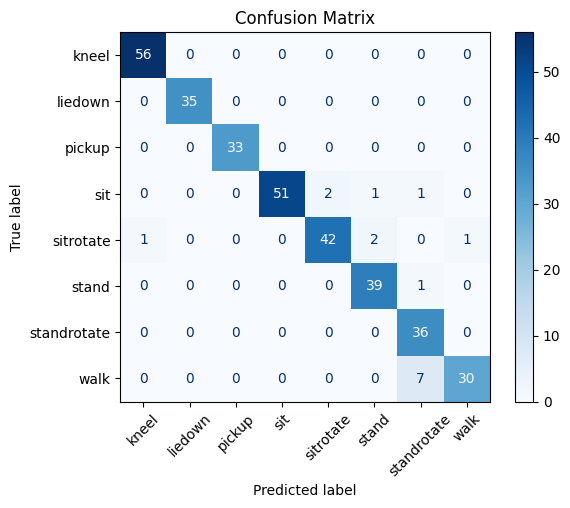

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step

=================Model outcomes from fold-2=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       1.00      0.98      0.99        56
    Lie Down       0.95      1.00      0.97        35
     Pick Up       0.92      1.00      0.96        33
         Sit       0.98      0.95      0.96        55
  Sit Rotate       0.96      1.00      0.98        46
       Stand       0.98      1.00      0.99        40
Stand Rotate       0.94      0.94      0.94        36
        Walk       1.00      0.86      0.93        37

    accuracy                           0.97       338
   macro avg       0.97      0.97      0.97       338
weighted avg       0.97      0.97      0.97       338



<Figure size 1200x800 with 0 Axes>

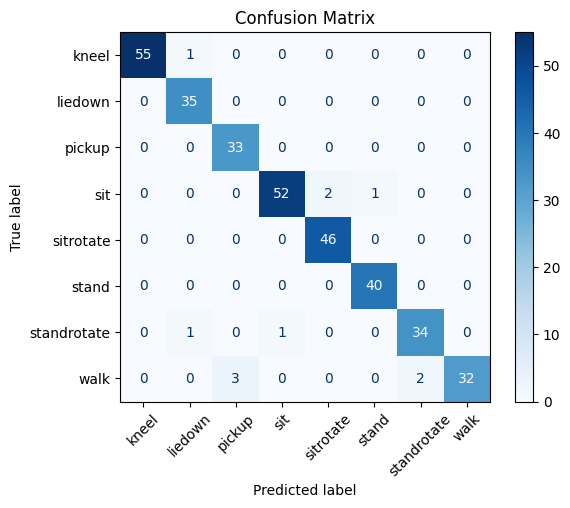

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step

=================Model outcomes from fold-3=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       0.98      0.96      0.97        56
    Lie Down       0.94      0.97      0.96        35
     Pick Up       1.00      1.00      1.00        33
         Sit       0.98      0.98      0.98        55
  Sit Rotate       0.98      1.00      0.99        46
       Stand       1.00      0.97      0.99        40
Stand Rotate       0.95      1.00      0.97        36
        Walk       1.00      0.95      0.97        37

    accuracy                           0.98       338
   macro avg       0.98      0.98      0.98       338
weighted avg       0.98      0.98      0.98       338



<Figure size 1200x800 with 0 Axes>

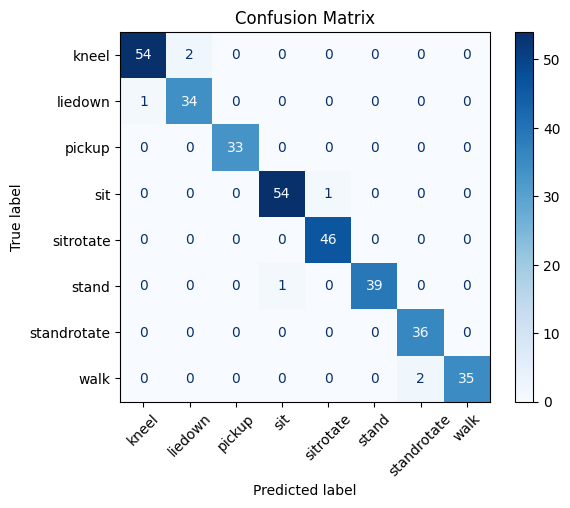

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step

=================Model outcomes from fold-4=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       1.00      1.00      1.00        56
    Lie Down       1.00      1.00      1.00        35
     Pick Up       0.89      1.00      0.94        33
         Sit       1.00      1.00      1.00        55
  Sit Rotate       1.00      0.98      0.99        46
       Stand       1.00      1.00      1.00        40
Stand Rotate       0.97      1.00      0.99        36
        Walk       1.00      0.89      0.94        37

    accuracy                           0.99       338
   macro avg       0.98      0.98      0.98       338
weighted avg       0.99      0.99      0.99       338



<Figure size 1200x800 with 0 Axes>

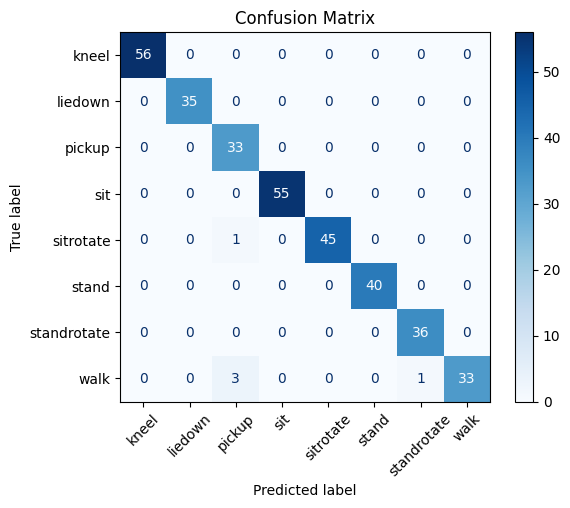

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step

=================Model outcomes from fold-5=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       0.97      1.00      0.98        56
    Lie Down       0.88      1.00      0.93        35
     Pick Up       0.97      1.00      0.99        33
         Sit       0.83      0.89      0.86        55
  Sit Rotate       0.93      0.83      0.87        46
       Stand       0.80      0.70      0.75        40
Stand Rotate       0.84      0.86      0.85        36
        Walk       0.82      0.76      0.79        37

    accuracy                           0.88       338
   macro avg       0.88      0.88      0.88       338
weighted avg       0.88      0.88      0.88       338



<Figure size 1200x800 with 0 Axes>

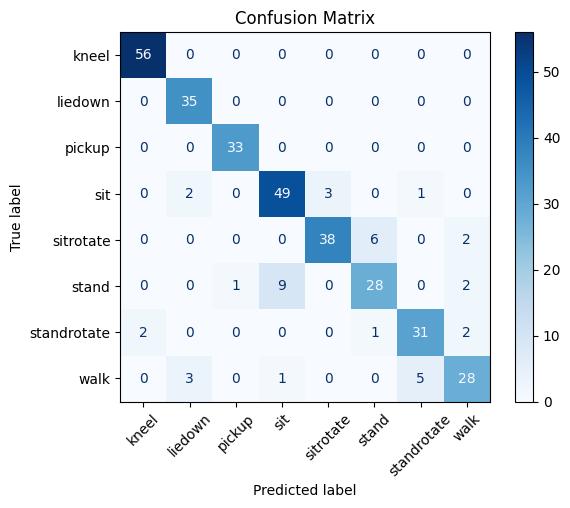

In [5]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

for i in range(1, 6):
    eva = load_model(f'/content/bilstm_fold_{i}.keras')
    # eva = load_model(f'bilstm_fold_{i}.keras')

    # Make predictions
    y_pred_encoded = eva.predict(x_test_holdout)
    y_pred = np.argmax(y_pred_encoded, axis=1)
    y_true = np.argmax(y_test_holdout, axis=1)

    # Generate confusion matrix and model outcome metrics
    cm = confusion_matrix(y_true, y_pred)
    print()
    print(f"=================Model outcomes from fold-{i}=================")
    print()
    print("Model type: ", Model_type)
    print()
    # print()
    # print("Target Length:  ", target_length)
    # print("Batch Size:     ", batchsize)
    # print("Early Stopping: ", monitor_choice)
    # print("Patience:       ", patience_number)
    # print("Dropout:        ", dropout)
    # print("Learning Rate:  ", learningrate)
    print()
    HAR_label = ['Kneel', 'Lie Down', 'Pick Up', 'Sit', 'Sit Rotate', 'Stand', 'Stand Rotate', 'Walk']

    # Print classification report
    print(classification_report(y_true, y_pred, zero_division=0, target_names=HAR_label))

    #print(confusion_matrix[0, 0])
    cmd = ConfusionMatrixDisplay(cm, display_labels=encoder.categories_[0])
    plt.figure(figsize=(12, 8))
    cmd.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=45)
    plt.title('Confusion Matrix')
    plt.show()

### Implementation of Ensemble model

In [6]:
model_ens = []
for i in range(1, 6):
    models = load_model(f'bilstm_fold_{i}.keras')
    model_ens.append(models)

### Evaluate performance of Ensemble model using a hold-out dataset

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step

=================Models voting outcomes=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       1.00      1.00      1.00        56
    Lie Down       1.00      1.00      1.00        35
     Pick Up       0.92      1.00      0.96        33
         Sit       1.00      1.00      1.00        55
  Sit Rotate       1.00      1.00      1.00        46
       Stand       1.00      1.00      1.00        40
Stand Rotate       0.92      1.00      0.96        36
        Walk       1.00      0.84      0.91        37

    accuracy                           0.98       338
   macro avg       0.98      0.98      0.98       338
weighted avg       0.98      0.98      0.98       338



<Figure size 1200x800 with 0 Axes>

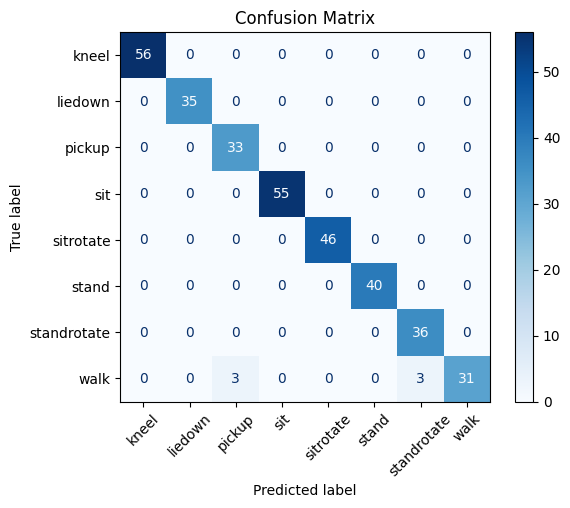

In [7]:
def ensemble_predict(models_vote, X):
    predict = [models.predict(X) for models in models_vote]
    mean = np.mean(predict, axis=0)
    return np.argmax(mean, axis=1)

y_true = np.argmax(y_test_holdout, axis=1)
y_pred = ensemble_predict(model_ens, x_test_holdout)



# Generate confusion matrix and model outcome metrics
cm = confusion_matrix(y_true, y_pred)
print()
print(f"=================Models voting outcomes=================")
print()
print("Model type: ", Model_type)
print()
# print()
# print("Target Length:  ", target_length)
# print("Batch Size:     ", batchsize)
# print("Early Stopping: ", monitor_choice)
# print("Patience:       ", patience_number)
# print("Dropout:        ", dropout)
# print("Learning Rate:  ", learningrate)
print()
HAR_label = ['Kneel', 'Lie Down', 'Pick Up', 'Sit', 'Sit Rotate', 'Stand', 'Stand Rotate', 'Walk']

# Print classification report
print(classification_report(y_true, y_pred, zero_division=0, target_names=HAR_label))

#print(confusion_matrix[0, 0])
cmd = ConfusionMatrixDisplay(cm, display_labels=encoder.categories_[0])
plt.figure(figsize=(12, 8))
cmd.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()